In [98]:
# Key Features for Customer Segmentation:

#     Demographic Features:

#         Age

#         Is_Senior

#         Marital_Status

#         Why? These features help group customers by life stage or relationship status, which often influence insurance needs.

#         Policy & Pricing Features:

#         Premium_Amount

#         Policy_Type

#         Prior_Insurance

#         Total_Discounts

#         Married_Premium_Discount

#         Safe_Driver_Discount

#         Multi_Policy_Discount

#         Bundling_Discount

#     Why? These give insight into policy preferences, pricing sensitivity, and discount utilization, aiding in identifying cost-conscious or high-value customers.


#     Behavioral Features:

#         Claims_Frequency

#         Claims_Severity

#         Website_Visits

#         Inquiries

#         Quotes_Requested

#         Time_to_Conversion

#         Source_of_Lead

#     Why? Behavioral patterns reveal customer engagement, loyalty, and potential interest in additional products.


#     Financial & Risk Features:

#         Credit_Score

#         Premium_Adjustment_Credit

#         Region

#         Claims_Adjustment

#     Why? These indicate customers' financial standing and regional trends that may affect policy risks or buying patterns.


#     Customer Journey Features:

#         Conversion_Status

#         Time_Since_First_Contact

#     Why? These features can highlight new leads versus long-term customers, enabling differentiated strategies.

# Data Preprocessing

In [99]:
import pandas as pd

df = pd.read_csv('synthetic_insurance_data.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 10000 non-null  int64 
 1   Is_Senior                           10000 non-null  int64 
 2   Marital_Status                      10000 non-null  object
 3   Married_Premium_Discount            10000 non-null  int64 
 4   Prior_Insurance                     10000 non-null  object
 5   Prior_Insurance_Premium_Adjustment  10000 non-null  int64 
 6   Claims_Frequency                    10000 non-null  int64 
 7   Claims_Severity                     10000 non-null  object
 8   Claims_Adjustment                   10000 non-null  int64 
 9   Policy_Type                         10000 non-null  object
 10  Policy_Adjustment                   10000 non-null  int64 
 11  Premium_Amount                      10000 non-null  int

In [100]:
# Label encoding
# 0 for single, 1 for married, 2 for divorced, 3 for widowed (Nominal data)
marital_status_mapping = {
    'Single': 0,
    'Married': 1,
    'Divorced': 2,
    'Widowed': 3
}

df["Marital_Status"] = df["Marital_Status"].astype('category').map(marital_status_mapping)

# 0 for No prior insurance, 1 for <1 years, 2 for 1-5 years, 3 for >5 years (Ordinal data)
prior_insurance_mapping = {
    'No': 0,
    '<1 year': 1,
    '1-5 years': 2,
    '>5 years': 3
}

df['Prior_Insurance'] = df['Prior_Insurance'].astype('category').map(prior_insurance_mapping)

# 0 for Low severity, 1 for Medium severity, 2 for High severity (Ordinal data)
claims_severity_mapping = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}

df['Claims_Severity'] = df['Claims_Severity'].astype('category').map(claims_severity_mapping)

# 0 for Full coverage, 1 for Liability-Only (Nominal data)
policy_type_mapping = {
    'Full Coverage': 0,
    'Liability-Only': 1
}

df['Policy_Type'] = df['Policy_Type'].astype('category').map(policy_type_mapping)

# 0 for Online, 1 for Agent, 2 for Referral (Nominal data)
source_of_lead_mapping = {
    'Online': 0,
    'Agent': 1,
    'Referral': 2
}

df['Source_of_Lead'] = df['Source_of_Lead'].astype('category').map(source_of_lead_mapping)

# 0 for Urban, 1 for Suburban, 2 for Rural (Nominal data)
region_mapping = {
    'Urban': 0,
    'Suburban': 1,
    'Rural': 2
}

df['Region'] = df['Region'].astype('category').map(region_mapping)


# Result after mapping / encoding
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Age                                 10000 non-null  int64   
 1   Is_Senior                           10000 non-null  int64   
 2   Marital_Status                      10000 non-null  category
 3   Married_Premium_Discount            10000 non-null  int64   
 4   Prior_Insurance                     10000 non-null  category
 5   Prior_Insurance_Premium_Adjustment  10000 non-null  int64   
 6   Claims_Frequency                    10000 non-null  int64   
 7   Claims_Severity                     10000 non-null  category
 8   Claims_Adjustment                   10000 non-null  int64   
 9   Policy_Type                         10000 non-null  category
 10  Policy_Adjustment                   10000 non-null  int64   
 11  Premium_Amount               

In [101]:
df.to_csv('processed_insurance_data.csv', index=False)

# Model Selection

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
df = pd.read_csv('processed_insurance_data.csv')
scaler = StandardScaler()

scaled_df = scaler.fit_transform(df)

print(scaled_df)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

print(scaled_df.info())


[[ 0.4988236  -0.43529869  0.05589565 ... -0.79422245  0.36514811
  -0.36514811]
 [-0.2129376  -0.43529869  0.05589565 ... -0.79422245 -0.90936537
   0.90936537]
 [ 0.64117585 -0.43529869  0.05589565 ... -0.79422245 -0.90936537
   0.90936537]
 ...
 [-0.78234656 -0.43529869  0.05589565 ...  1.25909309 -0.90936537
   0.90936537]
 [ 0.4988236  -0.43529869 -1.07330938 ...  1.25909309  0.36514811
  -0.36514811]
 [ 0.64117585 -0.43529869  1.18510068 ... -0.79422245  0.36514811
  -0.36514811]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 10000 non-null  float64
 1   Is_Senior                           10000 non-null  float64
 2   Marital_Status                      10000 non-null  float64
 3   Married_Premium_Discount            10000 non-null  float64
 4   Prior

## Demographic Features

In [2]:
selected_features = ['Age', 'Is_Senior', 'Marital_Status', 'Credit_Score', 'Region']
df_demo = scaled_df[selected_features]

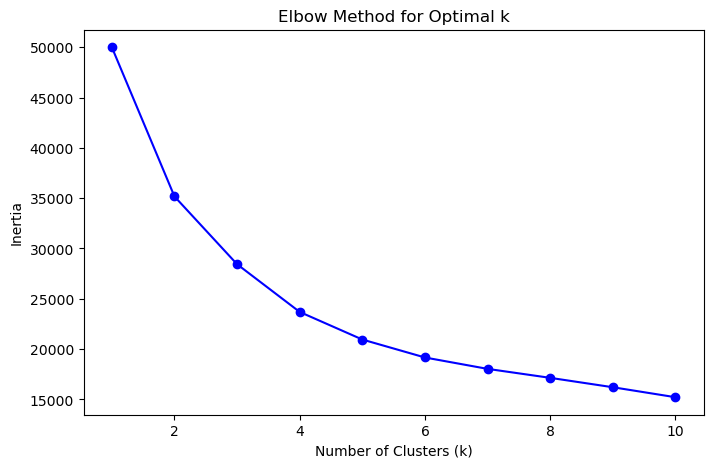

range(1, 11)
[50000.000000000015, 35169.237391603085, 28432.408614107433, 23689.817261910917, 20948.434756346673, 19164.187691531137, 18032.57166619353, 17141.54064068817, 16207.743754847714, 15215.848208281905]


In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = [] # List to store inertia values

cluster_range = range(1, 11) # Test up to 20 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_demo)
    inertia.append(kmeans.inertia_)

# Plot inertia to find the "elbow"
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

print(cluster_range)
print(inertia)

In [4]:
print(df['Age'].mean())
print(df['Is_Senior'].mean())
print(df['Marital_Status'].mean())
print(df['Credit_Score'].mean())
print(df['Region'].mean())

39.9917
0.1593
0.9505
714.2534
0.7135


We observed that, after number of clusters (k) reached 6, it doesn't bring significant improvement even though the k is increased. Hence we decided to use k = 6.

In [5]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df_demo)
df_demo['Cluster'] = kmeans.labels_
cluster_summary = df_demo.groupby('Cluster').mean()
print(cluster_summary)
print('\n')
print(df_demo['Cluster'].value_counts().sort_index())

              Age  Is_Senior  Marital_Status  Credit_Score    Region
Cluster                                                             
0       -0.327634  -0.435299       -0.348403      0.798810  0.876343
1        1.596312   2.297273       -0.003648     -0.020855  0.027518
2       -0.377659  -0.435299       -0.270457     -0.805915  0.942181
3       -0.113622  -0.435299        1.870502      0.077541 -0.169357
4       -0.299058  -0.435299       -0.347150     -0.868129 -0.909365
5       -0.339429  -0.435299       -0.388237      0.769533 -0.909365


Cluster
0    1835
1    1593
2    1820
3    1290
4    1667
5    1795
Name: count, dtype: int64


C:\Users\PC\AppData\Local\Temp\ipykernel_2988\395579177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['Cluster'] = kmeans.labels_


Cluster Naming and Interpretation. Based on the demographic segmentation results, we can name the clusters as follows:

- **Cluster 0 - Young Suburban Customers with Good Credit**

    - Average Age: Slightly below average (-0.327634), suggesting this group may consist of slightly younger individuals.

    - Is_Senior: Below average (-0.435299), indicating this group largely consists of non-senior customers

    - Marital Status: Below average (-0.348403), leaning toward unmarried individuals.

    - Credit Score: Above average (0.798810), suggesting financially reliable individuals.

    - Region: Above average (0.876343), leaning toward suburban areas with some urban influence.



- **Cluster 1 - Senior Customers with Moderate Credit**

    - Average Age: Well above average (1.596312), consisting of older customers.

    - Is_Senior: Strongly above average (2.297273), indicating a focus on senior citizens.

    - Marital Status: Near average (-0.003648), indicating no significant marital status bias.

    - Credit Score: Close to average (-0.020855), indicating stable but average financial reliability.

    - Region: Near average (0.027518), implying no strong regional bias.



- **Cluster 2 - Young Suburban Customers with Low Credit**

    - Average Age: Slightly below average (-0.377659), implying younger individuals.

    - Is_Senior: Below average (-0.435299), reinforcing non-senior customers.

    - Marital Status: Below average (-0.270457), leaning toward unmarried individuals.

    - Credit Score: Well below average (-0.805915), indicating low financial reliability.

    - Region: Above average (0.942181), leaning strongly toward suburban areas.



- **Cluster 3 - Suburban Married Customers**

    - Average Age: Slightly below average (-0.113622), indicating middle-aged individuals.

    - Is_Senior: Below average (-0.435299), non-seniors dominate this cluster.

    - Marital Status: Strongly above average (1.870502), suggesting a high proportion of married individuals.

    - Credit Score: Near average (0.077541), showing typical financial reliability.

    - Region: Slightly below average (-0.169357), indicating areas leaning toward suburban or semi-urban.



- **Cluster 4 - Young Rural Customers with Low Credit**

    - Average Age: Slightly below average (-0.299058), implying younger individuals.

    - Is_Senior: Below average (-0.435299), dominated by non-seniors.

    - Marital Status: Below average (-0.347150), leaning toward unmarried individuals.

    - Credit Score: Well below average (-0.868129), indicating financial struggles.

    - Region: Strongly below average (-0.909365), pointing toward rural areas.



- **Cluster 4 - Young Rural Customers with Good Credit**

    - Average Age: Slightly below average (-0.339429), representing younger individuals.

    - Is_Senior: Below average (-0.435299), indicating non-seniors.

    - Marital Status: Below average (-0.388237), likely unmarried individuals.

    - Credit Score: Above average (0.769533), suggesting good financial reliability.

    - Region: Strongly below average (-0.909365), indicating a rural customer base.

In [6]:
label_mapping = {
    0: "Young Suburban Customers with Good Credit",
    1: "Senior Customers with Moderate Credit",
    2: "Young Suburban Customers with Low Credit",
    3: "Suburban Married Customers",
    4: "Young Rural Customers with Low Credit",
    5: "Young Rural Customers with Good Credit"
}

df_demo['Cluster_Label'] = df_demo['Cluster'].map(label_mapping)

C:\Users\PC\AppData\Local\Temp\ipykernel_2988\2093241399.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_demo['Cluster_Label'] = df_demo['Cluster'].map(label_mapping)


In [7]:
print(df_demo.head())

        Age  Is_Senior  Marital_Status  Credit_Score    Region  Cluster  \
0  0.498824  -0.435299        0.055896     -0.206111  0.365148        2   
1 -0.212938  -0.435299        0.055896      0.236127 -0.909365        5   
2  0.641176  -0.435299        0.055896      1.160806 -0.909365        5   
3  1.566465   2.297273        0.055896      1.904569 -0.909365        1   
4 -0.284114  -0.435299       -1.073309     -1.050383  0.365148        2   

                              Cluster_Label  
0  Young Suburban Customers with Low Credit  
1    Young Rural Customers with Good Credit  
2    Young Rural Customers with Good Credit  
3     Senior Customers with Moderate Credit  
4  Young Suburban Customers with Low Credit  


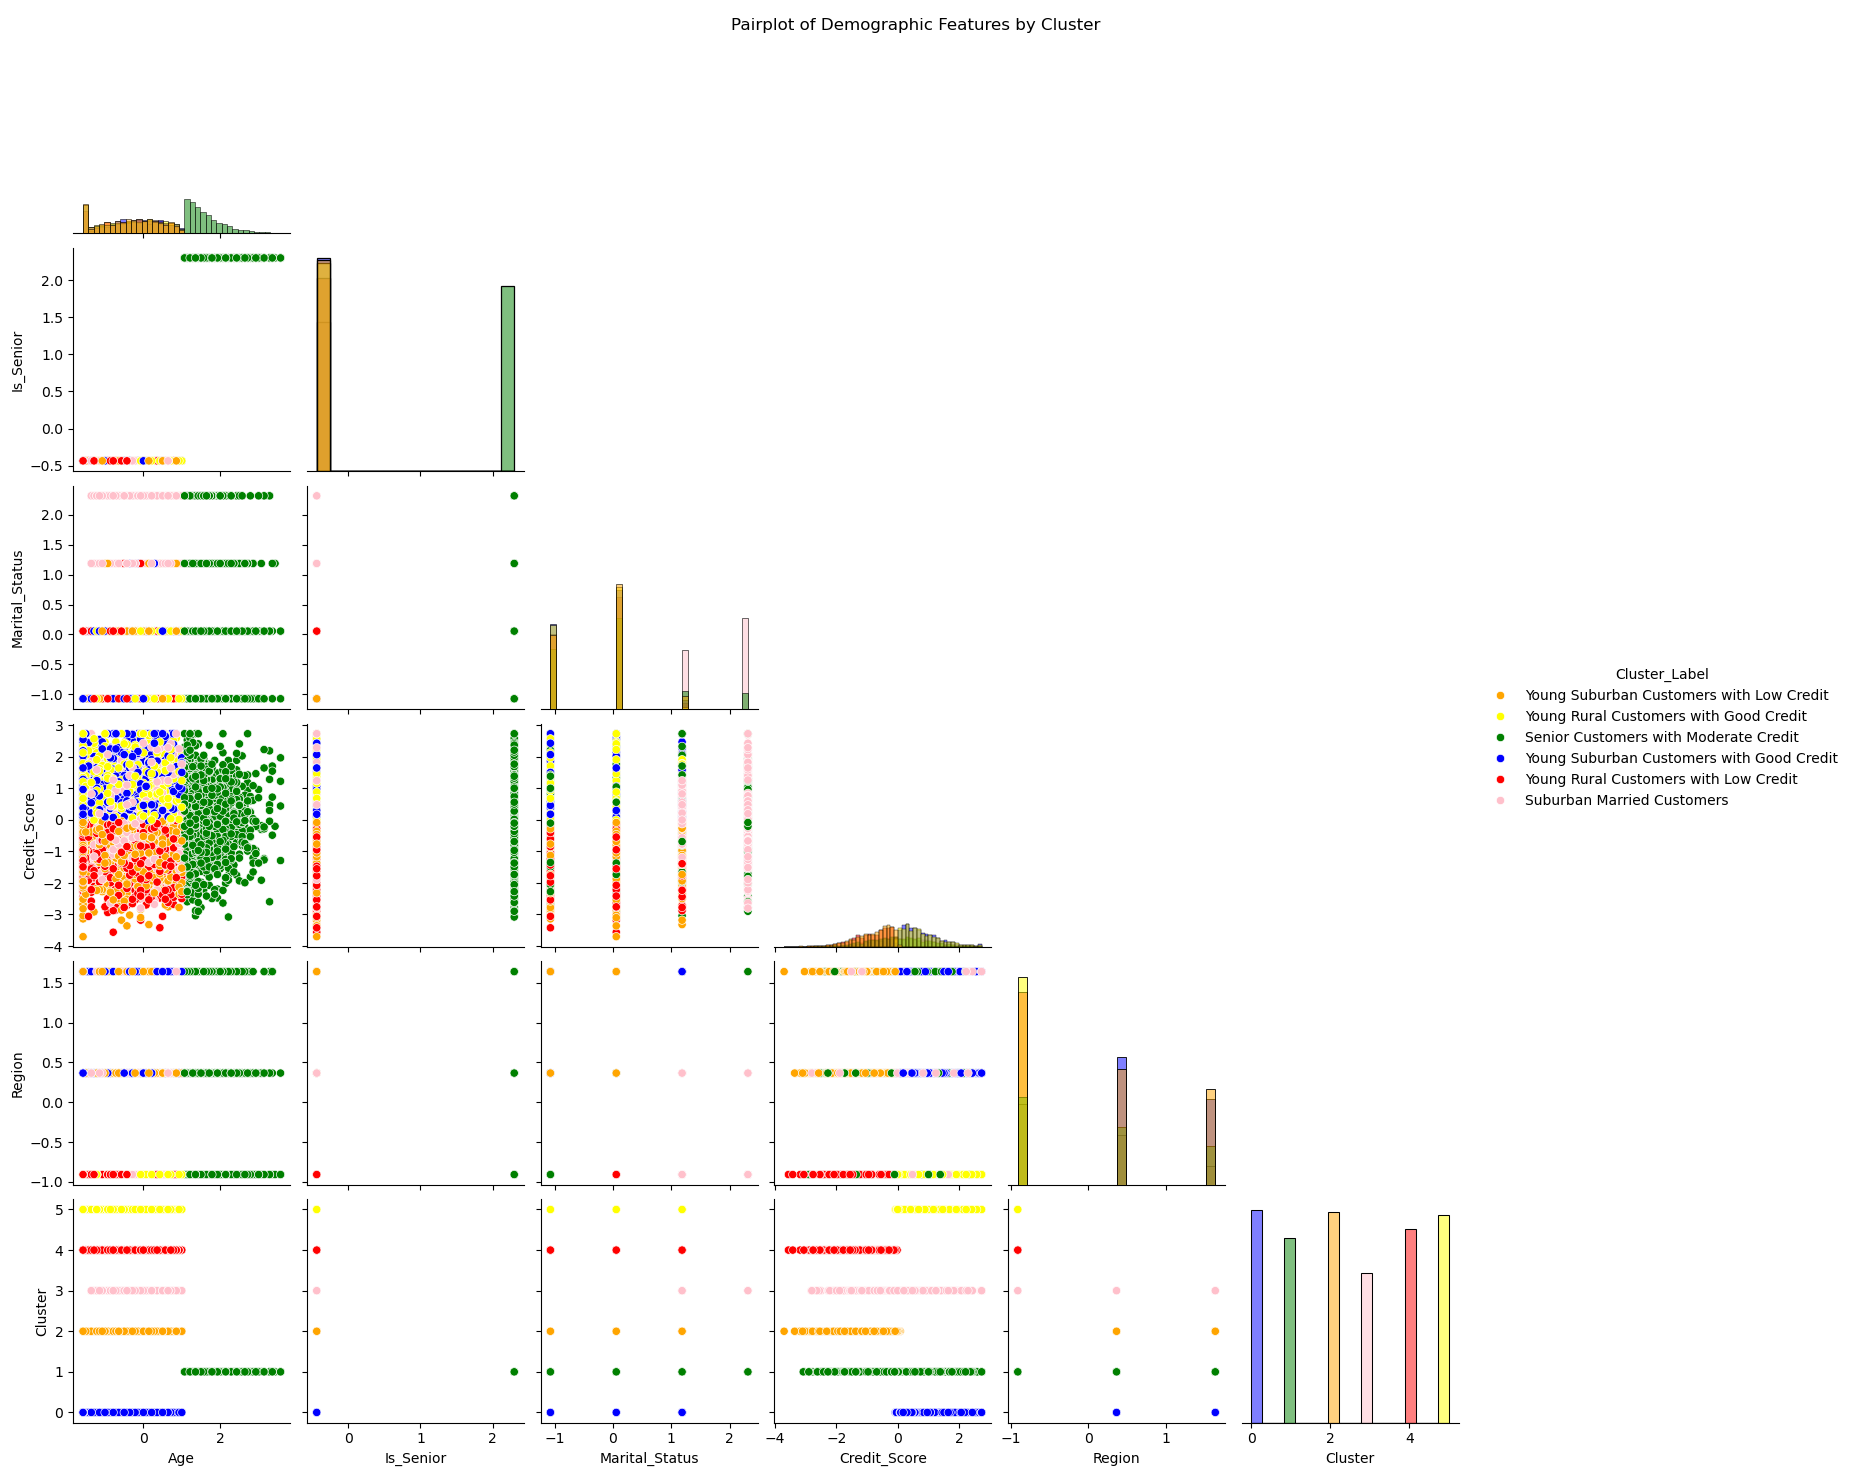

In [25]:
import seaborn as sns

custom_palette = {
    'Young Suburban Customers with Good Credit': 'blue',
    'Senior Customers with Moderate Credit': 'green',
    'Young Suburban Customers with Low Credit': 'orange',
    'Suburban Married Customers': 'pink',
    'Young Rural Customers with Low Credit': 'red',
    'Young Rural Customers with Good Credit': 'yellow'
}

# Create a pairplot of all features, colored by cluster
sns.pairplot(df_demo, hue='Cluster_Label', diag_kind='hist', palette=custom_palette, corner=True)
plt.suptitle('Pairplot of Demographic Features by Cluster')
plt.show()


After processing for the pairplot, there's 2 graph shows the Business Insight

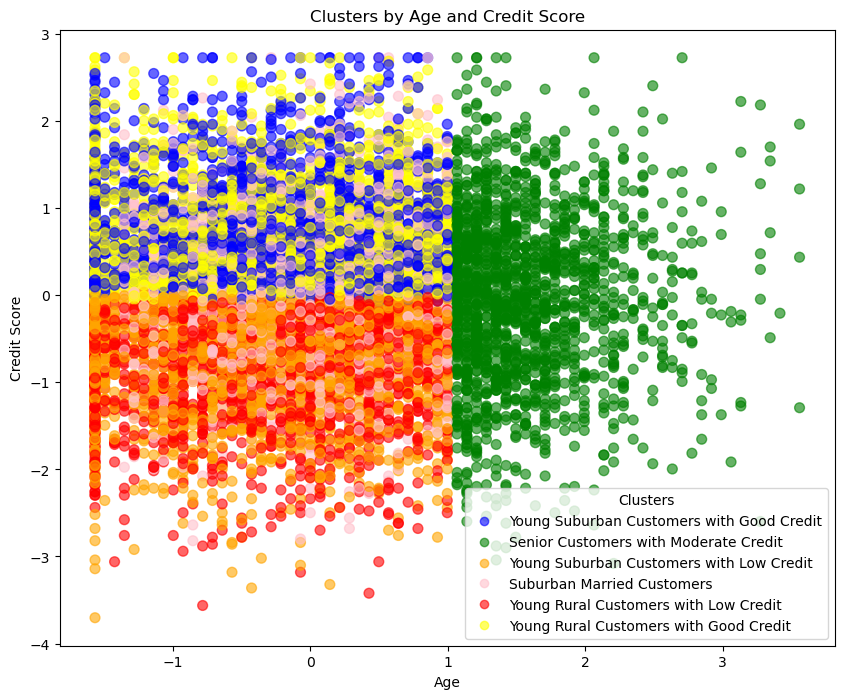

In [26]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(10, 8))

c_map_custom_palette = ListedColormap(['blue', 'green', 'orange', 'pink', 'red', 'yellow'])

# Scatter plot using Age and Credit Score
scatter = plt.scatter(df_demo['Age'], df_demo['Credit_Score'], 
                       c=df_demo['Cluster'], cmap=c_map_custom_palette, s=50, alpha=0.6)

# Add axis labels and title
plt.xlabel('Age')
plt.ylabel('Credit Score')
plt.title('Clusters by Age and Credit Score')

# Create a legend for the clusters
handles, labels = scatter.legend_elements()
# legend_labels = [f"Cluster {int(label)}" for label in sorted(df_demo['Cluster'].unique())]
legend_labels = ['Young Suburban Customers with Good Credit',
    'Senior Customers with Moderate Credit',
    'Young Suburban Customers with Low Credit',
    'Suburban Married Customers',
    'Young Rural Customers with Low Credit',
    'Young Rural Customers with Good Credit']
plt.legend(handles, legend_labels, title="Clusters")
scatter.set_cmap = custom_palette

# Show the plot
plt.show()



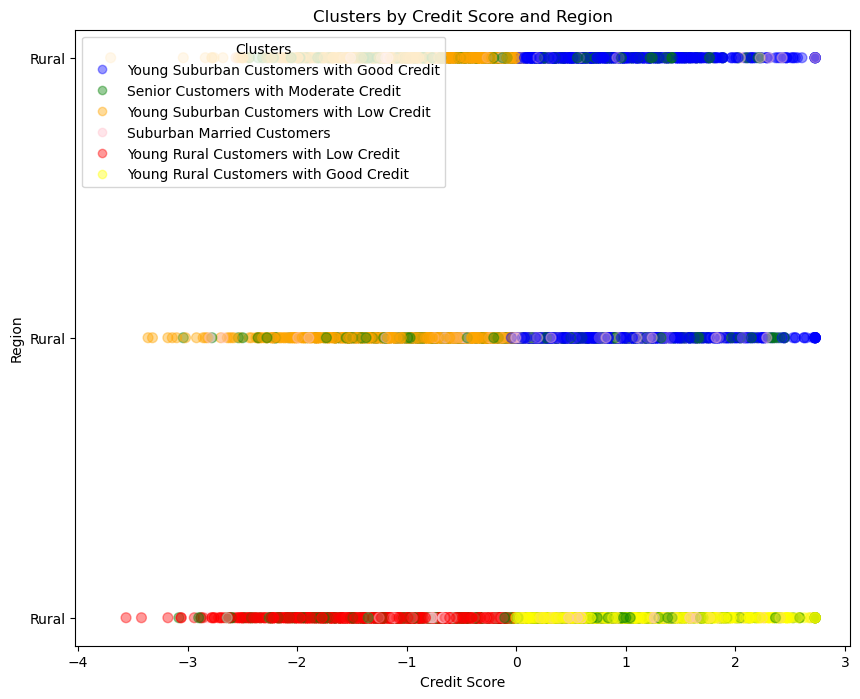

In [ ]:
plt.figure(figsize=(10, 8))

scatter = plt.scatter(df_demo['Credit_Score'], df_demo['Region'], c=df_demo['Cluster'], cmap=c_map_custom_palette, s=50, alpha=0.4)
plt.xlabel('Credit Score')

region_labels = ['Urban' if region == 0 else 'Suburban' if region == 1 else 'Rural' for region in sorted(df_demo['Region'].unique())]
plt.yticks(ticks=sorted(df_demo['Region'].unique()), labels=region_labels)

plt.ylabel('Region')
plt.title('Clusters by Credit Score and Region')

handles, labels = scatter.legend_elements()
plt.legend(handles, legend_labels, title="Clusters")

plt.show()

Business Recommendation
- Personalized Insurance Pricing
    - Offer lower premiums or better discounts for Cluster 1
    - Increase risk-adjusted pricing for Cluster 0

- Marketing Strategy Based on Credit Score
    - Target Cluster 1 for premium policies with better benefits
    - Offer Cluster 0 basic or lower-cost insurance plans to reduce risks

- Region-Based Adjustments
    - Focus urban campaigns on Cluster 1 to attract high-credit customers
    - Adjust policies to suburban or rural individuals in Cluster 2 and Cluster 0

## Behaviour Features

In [31]:
selected_features = ['Claims_Frequency', 'Claims_Severity', 'Website_Visits', 'Inquiries',
                      'Quotes_Requested', 'Time_to_Conversion', 'Source_of_Lead']

df_behav = scaled_df[selected_features]

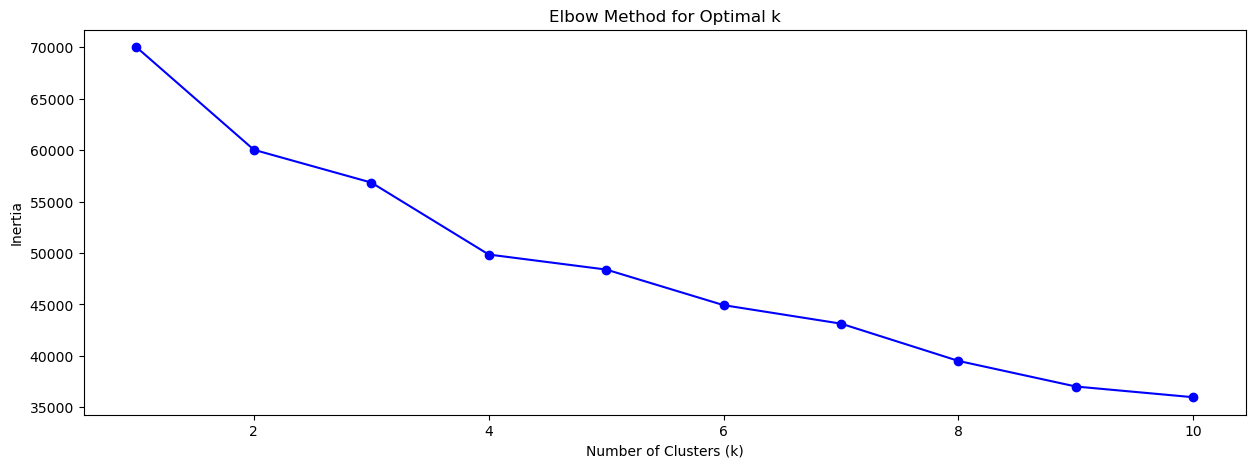

[70000.0, 60030.243724691485, 56844.32704860962, 49850.685862735096, 48390.578472339526, 44932.034630159455, 43133.396411181435, 39510.82398954842, 37022.68996709372, 35983.00749156756]


In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_behav)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(15, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

print(inertia)

We observed that there's no significant changes after cluster-4, hence we choose k = 4

In [34]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_behav)
df_behav['Cluster'] = kmeans.labels_
cluster_summary = df_behav.groupby('Cluster').mean()
print(cluster_summary)

         Claims_Frequency  Claims_Severity  Website_Visits  Inquiries  \
Cluster                                                                 
0               -0.177456        -0.493331       -0.003958  -0.215478   
1               -0.267449        -0.602654        0.005777  -0.391628   
2               -0.172185         1.500700        0.019102  -0.125074   
3                0.931343        -0.335232       -0.030144   1.129447   

         Quotes_Requested  Time_to_Conversion  Source_of_Lead  
Cluster                                                        
0                0.016199            0.012627        1.252253  
1               -0.019902           -0.024211       -0.740819  
2                0.014568           -0.016885       -0.146004  
3               -0.008841            0.046093       -0.299458  


C:\Users\PC\AppData\Local\Temp\ipykernel_2988\2457965989.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_behav['Cluster'] = kmeans.labels_


Cluster Naming and Interpretation. Based on the demographic segmentation results, we can name the clusters as follows:

- **Cautious Researcher (Cluster 0)**
    - Engage a lot before deciding
    - Moderate claims frequency & severity, high website visits, average inquiries, medium time to conversion

- **Hesitant Buyers (Cluster 1)**
    - Take the longest to decide
    - Highest time to conversion (99 days), moderate claims, medium engagement

- **Quick Decision Maker (Cluster 2)**
    - They decide fast
    - Low website visits, fewer inquiries, low time to conversion

- **Engaged Shoppers (Cluster 3)**
    - Most proactive & likely to convert
    - Highest website visits, highest inquiries, high quotes requested, shortest time to conversion

- **Pragmatic Buyers (Cluster 4)**
    - Efficient, but not highly engaged
    - Moderate claims, lower website visits, but still short time to conversion

- **Online Explorers (Cluster 5)**
    - Visit a lot but may not convert well
    - Low claims, highest website visits, moderate inquiries, low source of lead score

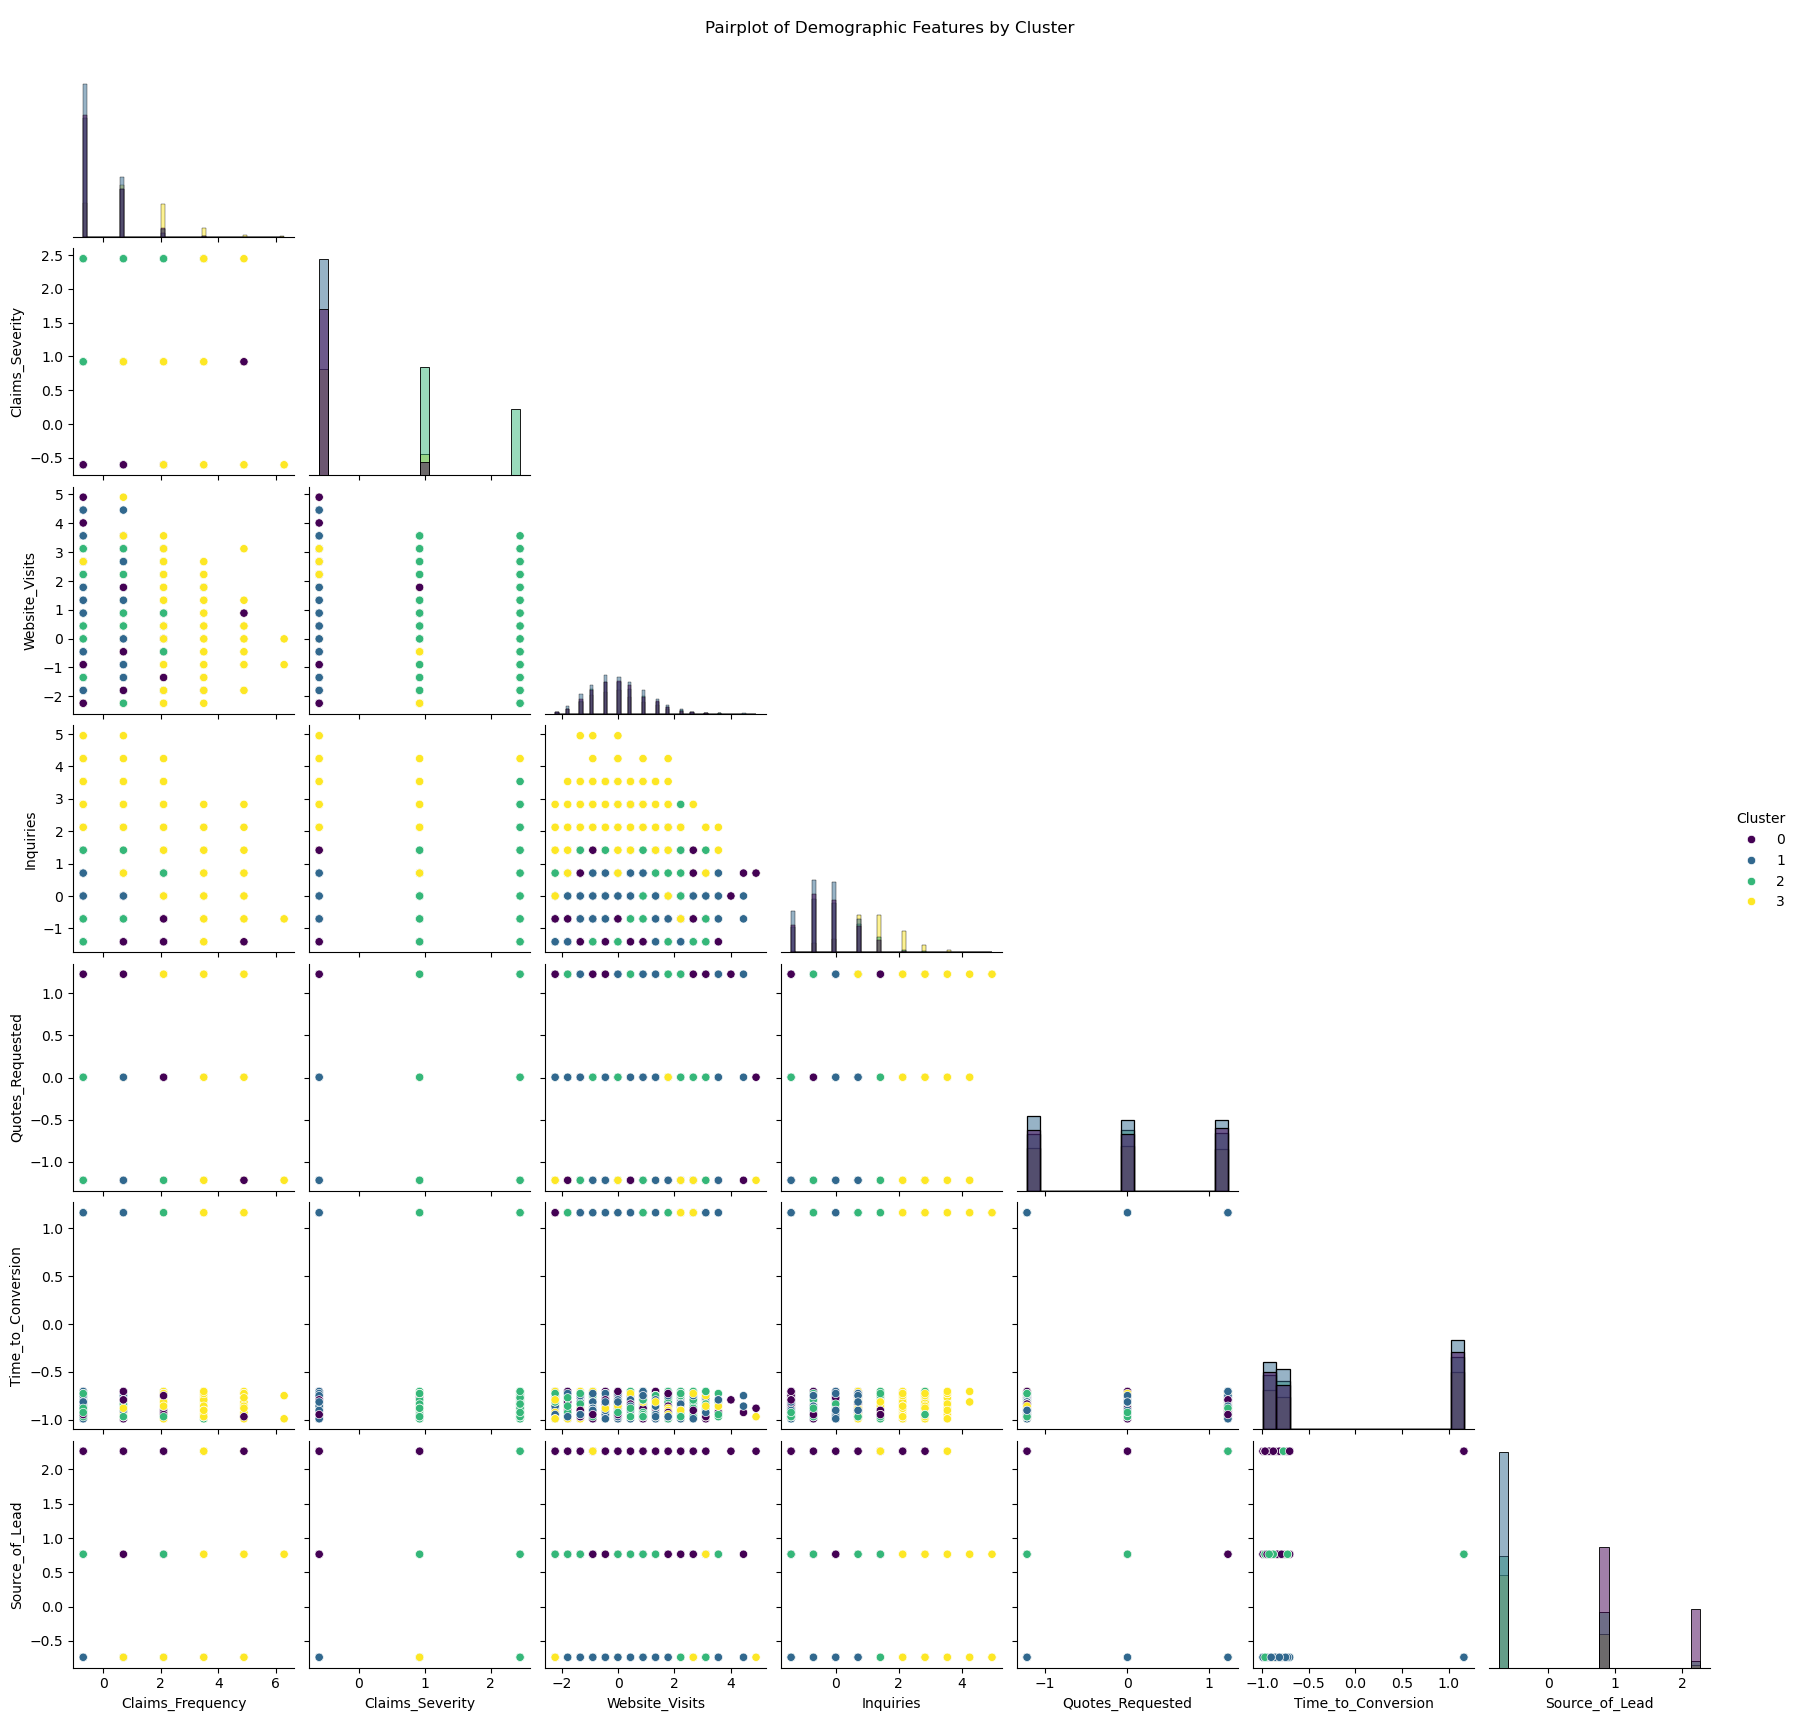

In [35]:
import seaborn as sns

# Create a pairplot of all features, colored by cluster
sns.pairplot(df_behav, hue='Cluster', diag_kind='hist', palette='viridis', corner=True)
plt.suptitle('Pairplot of Demographic Features by Cluster')
plt.show()